In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import odeint

task1_1 = True       ##Вывод sin(x) до и после нелинейности, просто для самопроверки, что всё задал верно
task1_2 = True       ##Вывод самой двузначной КЛФ аналитически и кусочно




def f21_klf(x):
    y = np.piecewise(
        x,
        [x < -1,
         (-1 <= x) & (x < 1),
         (1 <= x) & (x < 2),
         (2 <= x) & (x < 4),
         x >= 4],
        [lambda x: 2*(0 * x - 3),
         lambda x: 2*(1 * x - 2),
         lambda x: 2*(2 * x - 3),
         lambda x: 2*(1 * x - 1),
         lambda x: 2*(0 * x + 3)]
    )
    return y

def f22_klf(x):
    y = np.piecewise(
        x,
        [x < -4,
         (-4 <= x) & (x < -2),
         (-2 <= x) & (x < -1),
         (-1 <= x) & (x < 1),
         x >= 1],
        [lambda x: 2*(0 * x - 3),
         lambda x: 2*(1 * x + 1),
         lambda x: 2*(2 * x + 3),
         lambda x: 2*(1 * x + 2),
         lambda x: 2*(0 * x + 3)]
    )
    return y


def f21_analytical(x):
    return (np.abs(x + 1) + np.abs(x - 1) - np.abs(x - 2) - np.abs(x - 4))

def f22_analytical(x):
    return (np.abs(x + 4) + np.abs(x + 2) - np.abs(x + 1) - np.abs(x - 1))

    

def F(x, y):
    return np.where(y < 0, f21_analytical(x), f22_analytical(x))


def f1_sin(x):
    return np.sin(x)

def f1_sin_p(x):
    return np.cos(x)

delta2 = 4.5
x2 = np.linspace(-delta2, delta2, 1000)

y_1 = f1_sin(x2)
y_1p = f1_sin_p(x2)

y_res = F(y_1, y_1p)

y_klf21 = f21_analytical(x2)
y_klf22 = f22_analytical(x2)
y_analytical21 = f21_analytical(x2)
y_analytical22 = f22_analytical(x2)

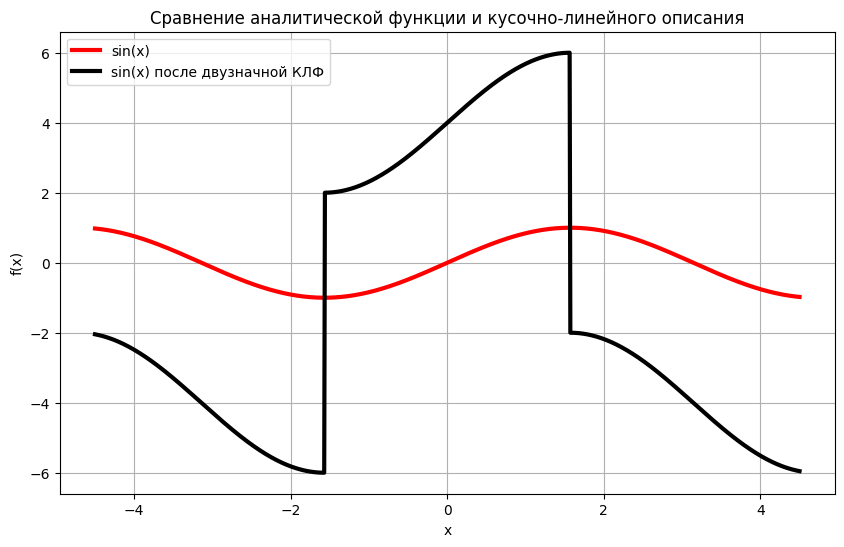

In [32]:
if task1_1:
    plt.figure(figsize=(10, 6))
    plt.plot(x2, y_1, 'r',label='sin(x)', linewidth=3)
    plt.plot(x2, y_res, 'black', label='sin(x) после двузначной КЛФ', linewidth=3)

    plt.title('Сравнение аналитической функции и кусочно-линейного описания')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

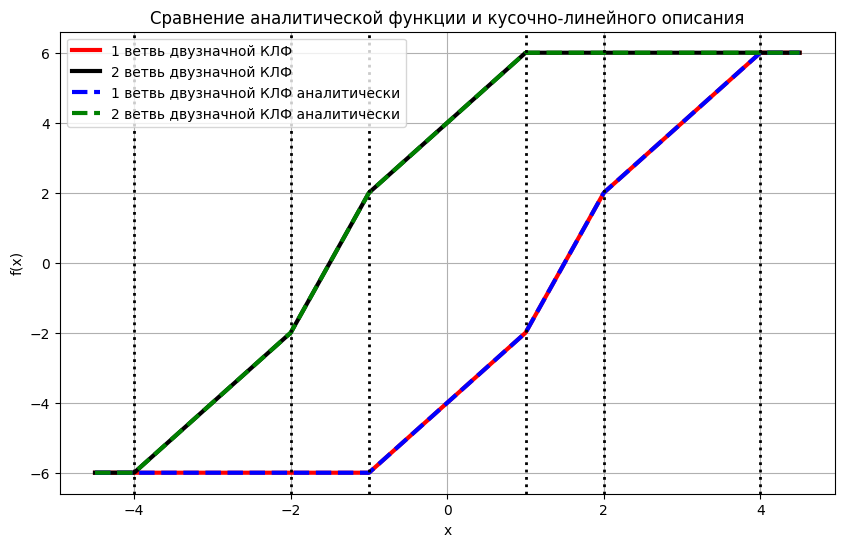

In [33]:
if task1_2:
    plt.figure(figsize=(10, 6))
    plt.plot(x2, y_klf21, 'r',label='1 ветвь двузначной КЛФ', linewidth=3)
    plt.plot(x2, y_klf22, 'black', label='2 ветвь двузначной КЛФ', linewidth=3)
    plt.plot(x2, y_analytical21,'b--', label='1 ветвь двузначной КЛФ аналитически', linewidth=3)
    plt.plot(x2, y_analytical22, 'g--', label='2 ветвь двузначной КЛФ аналитически', linewidth=3)
    knots2 = [-4, -2, -1,1 , 2, 4]
    for knot in knots2:
        plt.axvline(x=knot, color='black', linestyle=':', linewidth=2)
    plt.title('Сравнение аналитической функции и кусочно-линейного описания')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()


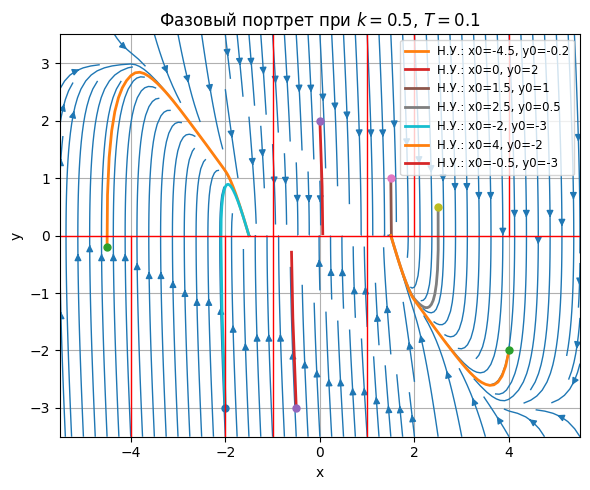

In [47]:
# Параметры системы
k = 0.5  # Коэффициент усиления
T = 0.1  # Постоянная времени

# Система дифференциальных уравнений
def system(t, z):
    x, y = z
    dxdt = y
    dydt = -1/T * (y + k * F(x, y))
    return [dxdt, dydt]

def plot_phase_portrait_stream(system, x_range, y_range, initial_conditions, t_span, t_eval=None, density=100):
    # Создание сетки для векторного поля
    x = np.linspace(x_range[0], x_range[1], density)
    y = np.linspace(y_range[0], y_range[1], density)
    X, Y = np.meshgrid(x, y)
    
    # Вычисление производных на сетке
    U = Y
    V = -1/T * (Y + k * F(X, Y))
    
    # Рассчитываем скорость для цветового отображения
    speed = np.sqrt(U**2 + V**2)
    
    
    # Построение потоков с использованием цветовой карты
    plt.figure(figsize=(6, 5))
    plt.streamplot(X, Y, U, V, cmap='cool', density=1.5, linewidth=1)

    # Решение системы для каждого начального условия и построение траекторий
    for ic in initial_conditions:
        # sol = odeint(system, ic, t_eval)
        sol = solve_ivp(system, t_span, ic, t_eval=t_eval, method='BDF', dense_output=False)
        plt.plot(sol.y[0], sol.y[1], label=f'Н.У.: x0={ic[0]}, y0={ic[1]}', linewidth=2)
        plt.plot(sol.y[0][0], sol.y[1][0], 'o', markersize=5)  # Начальная точка

    # Добавление линий раздела сегментов
    # Горизонтальная линия y=0
    plt.axhline(0, color='red', linewidth=1)
    

    boundaries_x_1 = [-1, 1, 2, 4]
    boundaries_x_2 = [-4, -2, -1, 1]
    
    y_max = y_range[1]  # Правильный индекс для верхней границы y
    y_min = y_range[0]  # Правильный индекс для нижней границы y
    
    
    for bx in boundaries_x_1:
        plt.plot([bx, bx], [0, y_max], color='red', linewidth=1)
    for bx in boundaries_x_2:
        plt.plot([bx, bx], [y_min, 0], color='red', linewidth=1)
        
        
        
    if len(initial_conditions) > 1:
        plt.legend(loc='upper right', fontsize='small')
    else:
        plt.legend().remove()

    plt.title(fr'Фазовый портрет при $k = {k}$, $T = {T}$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(x_range)
    plt.ylim(y_range)

    
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Диапазон осей
x_range = (-5.5, 5.5)
y_range = (-3.5, 3.5)

# Начальные условия
initial_conditions = [[-4.5, -0.2],[0, 2],[1.5, 1],[2.5, 0.5], [-2, -3], [4, -2], [-0.5, -3]] ##для к != 0
# initial_conditions = [[-3, 2],[-1, 2],[1, 2],[3, 2],[-2.5, -2],[-0.8, -2],[0.8, -2],[2.7, -2]] ##Случай к = 0 и любые т попробовать

# Время интегрирования
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 3000)  # Увеличено количество точек времени

# Плотность сетки
density = 1000  # Увеличено количество точек для сетки

# Построение фазового портрета
plot_phase_portrait_stream(system, x_range, y_range, initial_conditions, t_span, t_eval, density=density)